In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler
from scipy import stats

In [26]:
# mudar para o caminho do seu drive
PATH = "data/titanic/train.csv"
titanic_df = pd.read_csv(PATH)

In [27]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


#Remoção dados


###remoção direta




In [28]:
remo_direta = titanic_df.dropna()
remo_direta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
PassengerId    183 non-null int64
Survived       183 non-null int64
Pclass         183 non-null int64
Name           183 non-null object
Sex            183 non-null object
Age            183 non-null float64
SibSp          183 non-null int64
Parch          183 non-null int64
Ticket         183 non-null object
Fare           183 non-null float64
Cabin          183 non-null object
Embarked       183 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


###Seleção das colunas para remoção especifica


In [29]:
cols = ['Name','Ticket', 'Cabin']
remo_cols = titanic_df.drop(cols, axis=1)
remo_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.7+ KB


In [30]:
remo_cols = remo_cols.dropna()
remo_cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Sex            712 non-null object
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Fare           712 non-null float64
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 55.6+ KB


###Sem remoção de linhas com dados faltantes


In [31]:
fill_cols = titanic_df.copy()
cols = ['Name','Ticket', 'Cabin']
fill_cols = fill_cols.drop(cols, axis=1)
fill_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.7+ KB


In [32]:
fill_cols['Age'] = fill_cols['Age'].interpolate()
fill_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.7+ KB


In [33]:
fill_cols.dropna(inplace=True)
fill_cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


#Transformação de váriaveis catégoricas em váriaveis númericas contínuas

##Criando variáveis extras

In [34]:
extra_var_ex = fill_cols.copy()
extra_var_ex.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


In [35]:
aux = []
cols = ['Pclass', 'Sex', 'Embarked']
for col in cols:
  aux.append(pd.get_dummies(extra_var_ex[col]))
aux = pd.concat(aux, axis=1)
aux

,1,2,3,female,male,C,Q,S
0,0,0,1,0,1,0,0,1
1,1,0,0,1,0,1,0,0
2,0,0,1,1,0,0,0,1
3,1,0,0,1,0,0,0,1
4,0,0,1,0,1,0,0,1
5,0,0,1,0,1,0,1,0
6,1,0,0,0,1,0,0,1
7,0,0,1,0,1,0,0,1
8,0,0,1,1,0,0,0,1
9,0,1,0,1,0,1,0,0


In [36]:
extra_var_ex = pd.concat((aux, extra_var_ex), axis=1)
extra_var_ex = extra_var_ex.drop(['Pclass', 'Sex', 'Embarked'], axis=1)
extra_var_ex.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 14 columns):
1              889 non-null uint8
2              889 non-null uint8
3              889 non-null uint8
female         889 non-null uint8
male           889 non-null uint8
C              889 non-null uint8
Q              889 non-null uint8
S              889 non-null uint8
PassengerId    889 non-null int64
Survived       889 non-null int64
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Fare           889 non-null float64
dtypes: float64(2), int64(4), uint8(8)
memory usage: 55.6 KB


##Substituindo por valores contínuos


In [37]:
continuous_ex = fill_cols.copy()
continuous_ex.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


In [38]:
# Colunas para modificar: Embark, Sex
replace_map = { 'Embarked': {'C':0, 'Q': 1, 'S':2}, 'Sex': {'female':0, 'male':1}}
continuous_ex.replace(replace_map, inplace=True)
# replace_map = {}
# continuous_ex.replace(replace_map, inplace=True)
continuous_ex



,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2
5,6,0,3,1,44.5,0,0,8.4583,1
6,7,0,1,1,54.0,0,0,51.8625,2
7,8,0,3,1,2.0,3,1,21.0750,2
8,9,1,3,0,27.0,0,2,11.1333,2
9,10,1,2,0,14.0,1,0,30.0708,0


In [39]:
  corr = continuous_ex.corr()
  plt.subplots(figsize=(10,8))
  sns.heatmap(corr, annot=True, cmap=plt.cm.Reds,)

NameError: name 'sns' is not defined

In [40]:
continuous_ex.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Sex            889 non-null int64
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Fare           889 non-null float64
Embarked       889 non-null int64
dtypes: float64(2), int64(7)
memory usage: 69.5 KB


#Normalização

Nessa sessão nós normalizaremos a coluna "Fare" que é o valor da passagem dos passageiros

## Max norm


$\frac{X(i)}{max(X)}$

In [41]:
max_norm_df = continuous_ex.copy()
max_fare = max_norm_df['Fare'].max()
max_fare

512.3292

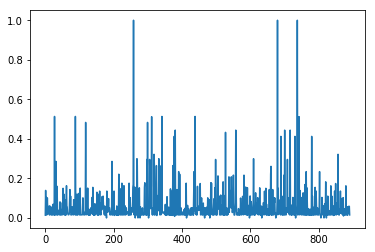

In [42]:
max_norm_df['Fare'] = max_norm_df['Fare']/max_fare
max_norm_df['Fare'].plot()

## Exercicios

### Min Max norm


$\frac{X(i)- min(X}{max(X)-min(X)}$

In [43]:
min_max_norm_df = continuous_ex.copy()
fare_max = min_max_norm_df['Fare'].max()
fare_min = min_max_norm_df['Fare'].min()
fare_max, fare_min

(512.3292, 0.0)

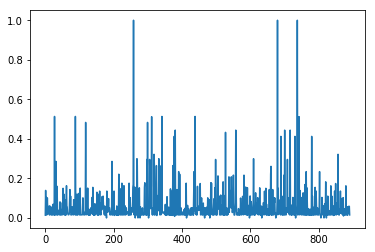

In [44]:
min_max_norm_df['Fare'] = (min_max_norm_df['Fare']-fare_min)/(fare_max-fare_min)
min_max_norm_df['Fare'].plot()

### Z-score norm


**$\frac{i-\mu} {\sigma}$** \\
$\mu$ = média \\
$\sigma$ = desvio padrão


In [45]:
zscore_norm_df = continuous_ex.copy()
fare_mean = zscore_norm_df['Fare'].mean()
fare_std = zscore_norm_df['Fare'].std()
fare_mean, fare_std

(32.09668087739032, 49.697504316707956)

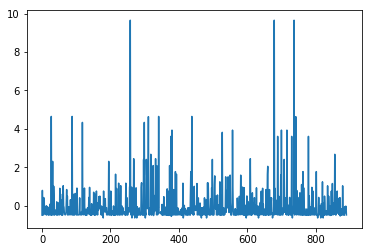

In [46]:
zscore_norm_df['Fare'] = (zscore_norm_df['Fare']-fare_mean)/fare_std
zscore_norm_df['Fare'].plot()

# com sklearn e scipy

In [47]:
min_max_norm_df = continuous_ex.copy()
fare_column = zscore_norm_df['Fare'].values.reshape(-1,1)
transformer = MaxAbsScaler().fit(fare_column)
fare_column = transformer.transform(fare_column)
fare_column

-02],
       [-5.00729957e-02],
       [-4.21854164e-03],
       [-3.97654888e-02],
       [ 9.41019555e-02],
       [-4.34268402e-02],
       [-5.06976931e-02],
       [-5.19643712e-02],
       [-2.02784703e-02],
       [-5.23114947e-02],
       [-5.03940902e-02],
       [-5.21553204e-02],
       [-3.66420019e-02],
       [-1.26952687e-02],
       [-3.97654888e-02],
       [-3.55054691e-02],
       [-1.21053462e-02],
       [ 4.37357286e-02],
       [-4.76435476e-02],
       [ 9.80844013e-02],
       [-3.50890042e-02],
       [-5.06976931e-02],
       [-3.38308637e-02],
       [-5.27800177e-02],
       [-4.28889758e-02],
       [ 9.68972099e-03],
       [-5.06023226e-02],
       [ 4.74420001e-03],
       [-1.26952687e-02],
       [-3.97654888e-02],
       [-4.07545930e-02],
       [ 7.18471110e-02],
       [-5.00729957e-02],
       [-3.66420019e-02],
       [-5.16087101e-02],
       [ 6.09757106e-02],
       [-5.07324679e-02],
       [-5.00729957e-02],
       [-4.87975719e-02],
      

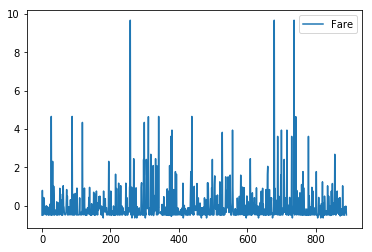

In [48]:
fare_column = stats.zscore(fare_column)
# fare_column
zscore_norm_df['Fare'] = fare_column
zscore_norm_df.plot.line(y='Fare')